<a href="https://colab.research.google.com/github/harshahs23/project1/blob/main/Sprint1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Now let's start with the task of netflix performance using python.It will start importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import iplot, plot
import plotly.graph_objects as go
from plotly.subplots import make_subplots



from collections import Counter

# Set Default Options
pd.set_option("display.max_columns", None)
pd.options.display.float_format = '{:,.3f}'.format

Let's load the data

In [4]:
df = pd.read_csv('/content/netflix1.csv')

Let's Get Quick Information!!



In [5]:
df.shape

(8790, 10)

In [6]:
print(f"Number of Rows(Observations): {df.shape[0]}")
print(f"Number of Columns(Features): {df.shape[1]}")

Number of Rows(Observations): 8790
Number of Columns(Features): 10


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [8]:
df.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [9]:
df.sample(10)

show_id     type                       title             director  \
4702   s6503    Movie        Clouds of Sils Maria      Olivier Assayas   
1355   s1498    Movie        Hello, Love, Goodbye  Cathy Garcia-Molina   
8318   s5940  TV Show                    The 4400            Not Given   
6359   s8587    Movie                     Thumper          Jordan Ross   
1848   s2252  TV Show                  The Twelve       Wouter Bouvijn   
8279   s5806  TV Show             The Fierce Wife            Not Given   
1461   s1660    Movie                   Hard Kill       Matt Eskandari   
8242   s5867  TV Show                      Cooked            Not Given   
5265   s7221    Movie                     Knowing          Alex Proyas   
5489   s7505  TV Show  Monty Don's French Gardens          Rachel Bell   

             country  date_added  release_year rating   duration  \
4702          France   2/12/2017          2014      R    124 min   
1355     Philippines  12/24/2020          2019  TV-14    117 min   
8318   United States    9/1/2013          2007  TV-14  4 Seasons   
6359   United States    2/5/2018          2017  TV-MA     93 min   
1848         Belgium   7/10/2020          2019  TV-MA   1 Season   
8279          Taiwan    9/1/2016          2010  TV-MA   1 Season   
1461   United States  11/23/2020          2020      R     98 min   
8242   United States   2/19/2016          2016  TV-14   1 Season   
5265   United States   10/1/2019          2009  PG-13    121 min   
5489  United Kingdom   7/26/2019          2013   TV-G   1 Season   

                                              listed_in  
4702                       Dramas, International Movies  
1355      Dramas, International Movies, Romantic Movies  
8318       TV Dramas, TV Mysteries, TV Sci-Fi & Fantasy  
6359                                  Dramas, Thrillers  
1848  Crime TV Shows, International TV Shows, TV Dramas  
8279  International TV Shows, Romantic TV Shows, TV ...  
1461                                 Action & Adventure  
8242                                         Docuseries  
5265                        Sci-Fi & Fantasy, Thrillers  
5489  British TV Shows, Docuseries, International TV...

Now!! Let's Dive Deeper Into Specefic Columns

• show_id Column

In [10]:
# Just We Want To Check For Duplicated Id
df["show_id"].duplicated().sum()
0

0

I Think Show_Id just represents a row ID

In [11]:
df.drop(columns="show_id", inplace=True)

• Type Column

In [12]:
df["type"].value_counts(normalize=1) * 100

type
Movie     69.693
TV Show   30.307
Name: proportion, dtype: float64

In [13]:
type_of_shows = df["type"].value_counts()

fig = px.bar(data_frame=type_of_shows,
             x = type_of_shows.index,
             y = type_of_shows,
             color = type_of_shows.index,
             color_discrete_sequence=["#222", "#E50914"],
             text_auto= True,
             title= "Show Type Frequency",
             labels = {
                    "y" : "Frequency",
                    "index" : "Show Type"
                }
            )

# Custom Format of numbers
fig.update_traces(insidetextfont = {
    "family": "consolas",
    "size": 15,

})

iplot(fig)

• Country Column

In [14]:
df["country"].value_counts()

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: count, Length: 86, dtype: int64

In [15]:
df["country"].nunique()

86

• date_added Column 📆

In [16]:
df["date_added"].dtype

dtype('O')

►► Let's Converting The Data Type From String Into DateTime.

In [17]:
df["date_added"] = pd.to_datetime(df["date_added"])

In [18]:
df["date_added"]

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-22
4      2021-09-24
          ...    
8785   2017-01-17
8786   2018-09-13
8787   2016-12-15
8788   2018-06-23
8789   2018-06-07
Name: date_added, Length: 8790, dtype: datetime64[ns]

In [19]:
print(f"Oldest Added Date: {df['date_added'].min()}")
print(f"Newest Added Date: {df['date_added'].max()}")

Oldest Added Date: 2008-01-01 00:00:00
Newest Added Date: 2021-09-25 00:00:00


• release_year Column 📆

In [20]:
released_year = df.release_year.value_counts()
released_year

release_year
2018    1146
2017    1030
2019    1030
2020     953
2016     901
        ... 
1966       1
1959       1
1925       1
1947       1
1961       1
Name: count, Length: 74, dtype: int64

In [21]:
fig = px.area(released_year, x = released_year.index, y = released_year)

iplot(fig)

• rating Column ✨✨

In [22]:
rating = df["rating"].value_counts()
rating

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

In [23]:
fig = px.bar(data_frame=rating,
             x = rating,
             y = rating.index,
             color = rating.index,
             text = rating,
             orientation= "h",
             title= "Popularity of Rating",
             labels = {
                    "x" : "Frequency",
                    "rating" : "Rating"
                },
             height=680
            )

# Custom Format of numbers
fig.update_traces(
    textposition = "outside",
    outsidetextfont = {
        "family": "consolas",
         "size": 13
    }
)

iplot(fig)

• duration Column ⏳⌚

In [24]:
df["duration"].value_counts()

duration
1 Season      1791
2 Seasons      421
3 Seasons      198
90 min         152
97 min         146
              ... 
5 min            1
16 min           1
186 min          1
193 min          1
11 Seasons       1
Name: count, Length: 220, dtype: int64

Actually, The Data is Almost Clean
  Now, it's time for our Favorite Part !!
   Ask Questions & Get Insights

In [25]:
df.head()

type                             title         director        country  \
0    Movie              Dick Johnson Is Dead  Kirsten Johnson  United States   
1  TV Show                         Ganglands  Julien Leclercq         France   
2  TV Show                     Midnight Mass    Mike Flanagan  United States   
3    Movie  Confessions of an Invisible Girl    Bruno Garotti         Brazil   
4    Movie                           Sankofa     Haile Gerima  United States   

  date_added  release_year rating  duration  \
0 2021-09-25          2020  PG-13    90 min   
1 2021-09-24          2021  TV-MA  1 Season   
2 2021-09-24          2021  TV-MA  1 Season   
3 2021-09-22          2021  TV-PG    91 min   
4 2021-09-24          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dramas, TV Horror, TV Mysteries  
3                 Children & Family Movies, Comedies  
4   Dramas, Independent Movies, International Movies

 For Each Type of Shows, What is The Most Common Rating?!?

By a Digiatal View

In [26]:
print("Movie")
df.loc[df["type"] == "Movie", "rating"].value_counts().nlargest(1)

Movie


rating
TV-MA    2062
Name: count, dtype: int64

In [27]:
print("TV Show")
df.loc[df["type"] == "TV Show", "rating"].value_counts().nlargest(1)

TV Show


rating
TV-MA    1143
Name: count, dtype: int64

By a Graphical View

In [28]:
movies = df.loc[df["type"] == "Movie", "rating"].value_counts()
tv_show = df.loc[df["type"] == "TV Show", "rating"].value_counts()

In [29]:
movies_bar = go.Bar(x = movies.index, y = movies, name="Movie")
tv_bar = go.Bar(x = tv_show.index, y = tv_show, name="Tv show")

In [30]:
fig = make_subplots(rows=1, cols=2, shared_yaxes=True)
fig.add_trace(movies_bar, row=1, col=1)
fig.add_trace(tv_bar, row=1, col=2)
fig.update_layout(height=550, width=800, title_text="Ratigin Per Each Show Type")
fig.update_xaxes(tickangle=90)
iplot(fig)

 Who are the top 5 directors with the most Movies & TV Shows?

In [31]:
directors = df["director"].value_counts()[1:6]
directors


director
Rajiv Chilaka             20
Alastair Fothergill       18
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Name: count, dtype: int64

In [32]:
fig = px.bar(directors,
       y =directors.index,
       x = directors,
       color=directors.index,
       text_auto=True,
       labels={"director": "Directory", "x": "Number of Movies & TV Shows"},
       orientation= "h",
      )

# Custom Format of numbers
fig.update_traces(
    textposition = "outside",
    outsidetextfont = {
        "family": "consolas",
         "size": 15,
    }
)
fig.update_layout(showlegend=False,height=550, width=800, title_text="Top 5 Directors")
iplot(fig)

What is The Number of Movies and TV Shows Added to the Netflix Platform per Each Year??

In [33]:
shows_added_via_year = df.groupby(df["date_added"].dt.year)["type"].count()
shows_added_via_year

date_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     426
2017    1185
2018    1648
2019    2016
2020    1879
2021    1498
Name: type, dtype: int64

In [34]:
fig = px.line(shows_added_via_year, x=shows_added_via_year.index,
              y=shows_added_via_year,
              markers=True, line_shape='linear',
              title='Movies & TV Shows Added via Years',
              width=800,
              height=550,
             labels={"y": "Number of Movies & Tv Shows",
                    "date_added": "Year"})

# Custom Format
fig.update_xaxes(tickvals=shows_added_via_year.index)
fig.update_traces(line=dict(color='darkred'))
fig.update_layout(
    margin=dict(l=40, r=10, t=80, b=20),
)
iplot(fig)

How Many Movies and TV Shows Added By Each Country ??

In [35]:
shows_via_country = df.pivot_table(index="country", columns = df["type"], values = "type",
                                   aggfunc="count")\
.fillna(0)\
.sort_values("Movie", ascending = False)

shows_via_country

type               Movie  TV Show
country                          
United States  2,395.000  845.000
India            976.000   81.000
United Kingdom   387.000  251.000
Not Given        257.000   30.000
Canada           187.000   84.000
...                  ...      ...
Ukraine            0.000    2.000
Cyprus             0.000    1.000
Puerto Rico        0.000    1.000
Senegal            0.000    1.000
Belarus            0.000    1.000

[86 rows x 2 columns]

We Notice That there is a country we don't know it's name _4th Country_.
So We Will Not Include it in our graph

In [36]:
top_5_country = shows_via_country[shows_via_country.index != "Not Given"].head()
fig = px.bar(top_5_country, barmode="group", text_auto=True,
             color_discrete_sequence=["#141E46", "#F45050"],
            labels={"value":"Counts", "country":"Country", "type":"Show Type"},
            )

# Custom Format of numbers
fig.update_traces(
    textposition = "outside",
    outsidetextfont = {
        "family": "consolas",
         "size": 10,
    }
)

fig.update_layout(
    height=580, width=780,
    title_text="Top 10 Countries",
    legend = {
        "xref":"paper",
        "x": 0.3,
        'y': 1,
        "orientation" : "h"
    },
     margin=dict(l=40, r=10, t=80, b=20),
)

iplot(fig)

 I Got an Idea!!
I Need To Knwo What Was The Average Duration Of Added Films _not TV Shows_, Per Each Year ?

In [37]:
# Filter To Get Only Movies Records From Original DataFrame
filt = df["type"] == "Movie"
df_movies = df[filt].copy()
df_movies.shape

(6126, 9)

In [38]:
# Add Additional Column of Duration Minute
df_movies["duration_in_min"] = df_movies["duration"].str.split(" ", expand=True)[0].astype(int)
df_movies.head()

type                             title         director        country  \
0  Movie              Dick Johnson Is Dead  Kirsten Johnson  United States   
3  Movie  Confessions of an Invisible Girl    Bruno Garotti         Brazil   
4  Movie                           Sankofa     Haile Gerima  United States   
6  Movie                      The Starling   Theodore Melfi  United States   
7  Movie   Motu Patlu in the Game of Zones      Suhas Kadav          India   

  date_added  release_year rating duration  \
0 2021-09-25          2020  PG-13   90 min   
3 2021-09-22          2021  TV-PG   91 min   
4 2021-09-24          1993  TV-MA  125 min   
6 2021-09-24          2021  PG-13  104 min   
7 2021-05-01          2019  TV-Y7   87 min   

                                           listed_in  duration_in_min  
0                                      Documentaries               90  
3                 Children & Family Movies, Comedies               91  
4   Dramas, Independent Movies, International Movies              125  
6                                   Comedies, Dramas              104  
7  Children & Family Movies, Comedies, Music & Mu...               87

In [39]:
# Group By Year and Get The Average Of Duration of all Movies and Number of Movies
year_group_by_duration = df_movies.groupby(df["date_added"].dt.year)["duration_in_min"]\
.agg(["count", "mean"]).apply(round)

year_group_by_duration

count    mean
date_added               
2008            1  81.000
2009            2  66.000
2010            1  84.000
2011           13  93.000
2012            3  62.000
2013            6  84.000
2014           19  77.000
2015           56  84.000
2016          251  84.000
2017          836  96.000
2018         1237 102.000
2019         1424 100.000
2020         1284 102.000
2021          993 103.000

We Will Not Graph The First 3 Year Beacuse have OInly 1 or 2 Movies This Year

In [40]:
fig = px.scatter(year_group_by_duration[3:],
           x = year_group_by_duration[3:].index,
           y = year_group_by_duration[3:]["mean"],
           size=year_group_by_duration[3:]["mean"],
          color_discrete_sequence=["darkred"],
          labels={"x": "Year", "y":"AVG Duration in Minutes"})


# Custom Format
fig.update_layout(height=580, width=780,
                  title_text="Avg Duration(Minute) of Movies in Period [2014 : 2021]",
                      margin=dict(l=70, r=10, t=80, b=20),
)

fig.update_xaxes(tickvals=year_group_by_duration[3:].index)

iplot(fig)

Spectacular Question ?!?
what are The Top 10 Popular Categories That Movies & TV Shows Listed In?!

In [41]:
listed_in = df["listed_in"].str.split(", ")
listed_in.head()

0                                      [Documentaries]
1    [Crime TV Shows, International TV Shows, TV Ac...
2                 [TV Dramas, TV Horror, TV Mysteries]
3                 [Children & Family Movies, Comedies]
4    [Dramas, Independent Movies, International Mov...
Name: listed_in, dtype: object

In [42]:
counter = Counter()
for i in listed_in:
    counter.update(i)

In [43]:
top_10_listed_in = counter.most_common(10)[::-1]

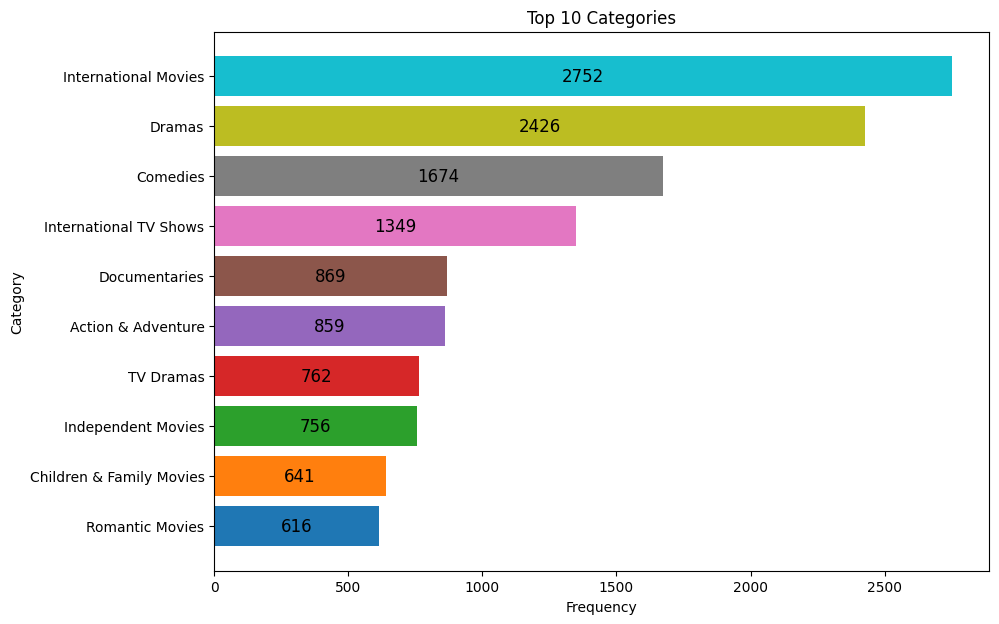

In [44]:
plt.figure(figsize=(10, 7))
for i in top_10_listed_in:
    fig = plt.barh(i[0], i[1])
    plt.bar_label( fig, label_type='center', size="12", family="consolas")

plt.title("Top 10 Categories")
plt.xlabel("Frequency")
plt.ylabel("Category")
plt.show()
